In [1]:
## first line of code is to clear R's memory
rm(list=ls())

In [3]:
#libraries
library(Signac)
library(Seurat)
library(rtracklayer)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(qs)
library(SeuratWrappers)
library(ggplot2)
library(patchwork)
library(JASPAR2020)
library(TFBSTools)
library(BSgenome.Hsapiens.UCSC.hg38)
library(cicero)




The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.1”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Loading required package: GenomicRange

In [4]:
#####################
#Read processed Seurat Object
###################
seurat_object = qread("complete/GSE184462_merged_1_10_CoAc.rds")

An object of class Seurat 
243302 features across 55560 samples within 2 assays 
Active assay: peaks (223695 features, 112394 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 3 dimensional reductions calculated: lsi, harmony, umap

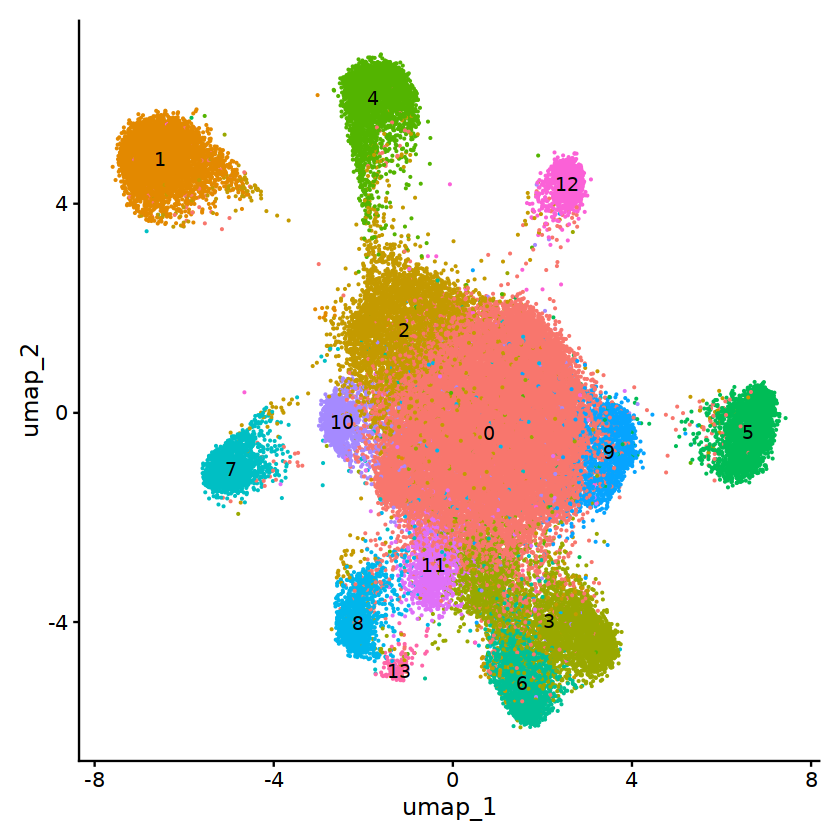

In [5]:
seurat_object
p1 <- DimPlot(seurat_object, label = TRUE, pt.size = 0.1) + NoLegend()
p1

In [6]:
library(BSgenome.Hsapiens.UCSC.hg38)
seurat_object[["peaks"]]
#Removign scaffold debris
main.chroms <- standardChromosomes(BSgenome.Hsapiens.UCSC.hg38)
keep.peaks <- as.logical(seqnames(granges(seurat_object)) %in% main.chroms)
seurat_object[["peaks"]] <- subset(seurat_object[["peaks"]], features = rownames(seurat_object[["peaks"]])[keep.peaks])


ChromatinAssay data with 223695 features for 55560 cells
Variable features: 112394 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 10 

Warning message:
"Different cells and/or features from existing assay peaks"


In [7]:
###################
# extract gene annotations from EnsDb
###################
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

# change to UCSC style since the data was mapped to hg38
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "hg38"

genome(seurat_object) <- genome(annotations)

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [8]:
#Get list of motifs
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

# add motif information
seurat_object <- AddMotifs(
  object = seurat_object,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  pfm = pfm
)

Building motif matrix

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI270771v1_alt, chr2_KI270772v1_alt, chr2_KI270773v1_alt, chr2_KI270774v1_alt, chr2_KI270775v1_alt, chr2_KI270776v1_alt, chr2_KI270893v1_alt, chr2_KI270894v1_alt, chr3_GL383526v1_alt, chr3_JH636055v2_alt, chr3_KI270777v1_alt, chr3_KI270778v1_alt, chr3_KI270779v1_alt, chr3_KI270780v1_alt, chr3_KI270781v1_alt, chr3_KI270782v1_alt, chr3_KI270783v1_alt, chr3_KI270784v1_alt, chr3_KI270895v1_alt, chr3_KI270924v1_alt, chr3_KI270934v1_alt, ch

In [9]:
Idents(seurat_object) <- seurat_object$cell.type
ident_lyst <- unique(Idents(seurat_object))
ident_lyst

[1] Mesothelial Cell                       
 [2] Fibroblast (General)                   
 [3] Pericyte (General) 3                   
 [4] Pericyte (General) 1                   
 [5] Endothelial Cell (General) 1           
 [6] Endothelial Cell (General) 2           
 [7] Adipocyte                              
 [8] Lymphatic Endothelial Cell             
 [9] Macrophage (General)                   
[10] Pericyte (General) 2                   
[11] Pericyte (Esophageal Muscularis)       
[12] Macrophage (General,Alveolar)          
[13] T Lymphocyte 1 (CD8+)                  
[14] Vascular Smooth Muscle 2               
[15] Cardiac Pericyte 4                     
[16] Endothelial Cell (General) 3           
[17] Vascular Smooth Muscle 1               
[18] Cardiac Pericyte 3                     
[19] Naive T cell                           
[20] Schwann Cell (General)                 
[21] Pericyte (General) 4                   
[22] Cardiac Pericyte 2                     
[23] Plasma Cell                            
[24] Alverolar Type 2,Immune                
[25] Endothelial Cell (Myocardial)          
[26] Mast Cell                              
[27] Fibroblast (Peripheral Nerve)          
[28] Cardiac Fibroblasts                    
[29] Fibroblast (Epithelial)                
[30] Peripheral Nerve Stromal               
[31] Luteal Cell (Ovarian)                  
[32] Small Intestinal Enterocyte            
[33] Smooth Muscle (General)                
[34] Smooth Muscle (Esophageal Muscularis) 3
[35] Chief Cell                             
[36] Natural Killer T Cell                  
[37] T lymphocyte 2 (CD4+)                  
[38] Foveolar Cell                          
[39] Pancreatic Acinar Cell                 
[40] Alveolar Capillary Endothelial Cell    
[41] Ductal Cell (Pancreatic)               
[42] Memory B Cell                          
[43] Transitional Zone Cortical Cell        
[44] Cortical Epithelial-like               
[45] Zona Fasciculata Cortical Cell         
[46] Zona Glomerulosa Cortical Cell         
[47] Endothelial (Exocrine Tissues)         
[48] Fibroblast (Liver Adrenal)             
[49] CNS,Enteric Neuron                     
[50] Smooth Muscle (Vaginal)                
[51] Endocardial Cell                       
[52] Cardiac Pericyte 1                     
[53] Alveolar Type 2 (AT2) Cell             
[54] Keratinocyte 1                         
[55] Smooth Muscle (GE Junction)            
55 Levels: Mesothelial Cell Fibroblast (General) ... Smooth Muscle (GE Junction)

In [10]:
#find markers
DefaultAssay(seurat_object) <- "peaks"

da_peaks <- FindMarkers(
  object = seurat_object,
  ident.1 = "Endothelial Cell (General) 1",
  ident.2 = "Adipocyte",
  only.pos = TRUE,
  test.use = 'LR',
  min.pct = 0.05,
  latent.vars = 'nCount_peaks'
)

# get top differentially accessible peaks
top.da.peak <- rownames(da_peaks[da_peaks$p_val < 0.005, ])

In [11]:
head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrM-13365-16493,9.546100e-314,1.169187,0.981,0.938,2.132560e-308
chrM-9-3843,1.935783e-305,1.153697,0.982,0.944,4.324463e-300
chrM-12826-13122,4.684343e-217,1.215526,0.774,0.583,1.046463e-211
chr14-38255065-38256688,1.396541e-115,4.246825,0.123,0.007,3.119816e-110
chr20-23048354-23051273,2.912002e-104,2.703532,0.151,0.026,6.505296e-99
chr15-101167306-101168810,7.171271e-91,5.212685,0.092,0.003,1.602033e-85


In [12]:
enriched.motifs <- FindMotifs(
  object = seurat_object,
  features = top.da.peak,
)

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 1063 regions



Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>."


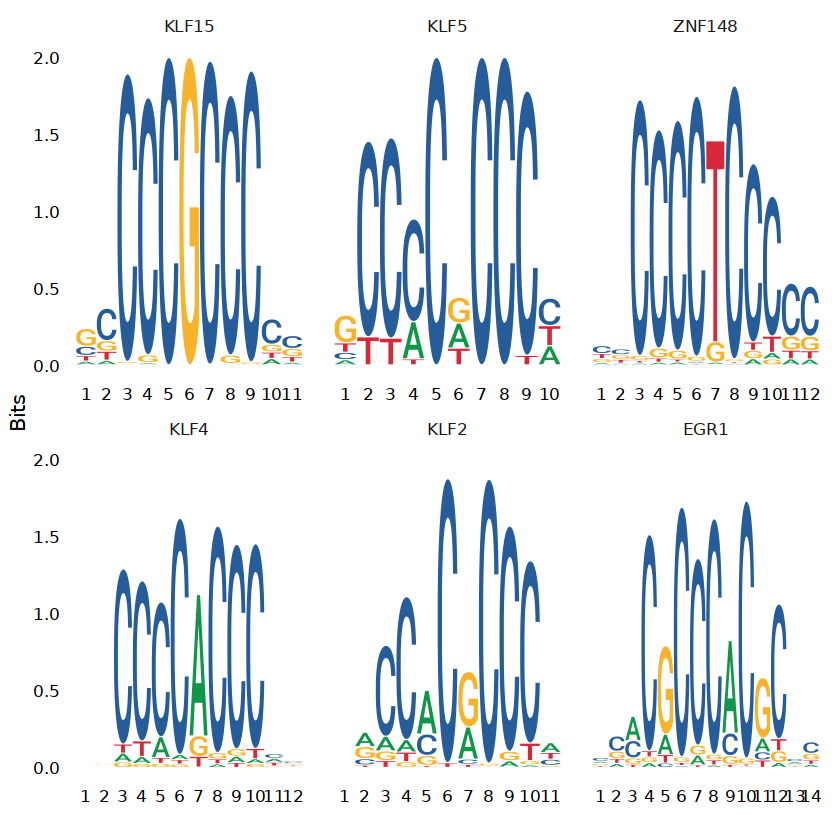

In [13]:
DefaultAssay(seurat_object) <- "peaks"
mp <- MotifPlot(
  object = seurat_object,
  motifs = head(rownames(enriched.motifs))
)

mp


In [31]:
if (FALSE){
ggsave(mp, 
       filename = "exports/motif_plot.png",
       device = "png",
       height = 4, width = 6, units = "in")    
}


In [14]:
enriched.motifs

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
MA1513.1,MA1513.1,778,9242,73.18909,23.1050,3.167673,2.064556e-270,KLF15,1.540159e-267
MA0599.1,MA0599.1,894,14750,84.10160,36.8750,2.280721,3.997465e-227,KLF5,1.491055e-224
MA1653.1,MA1653.1,887,14602,83.44309,36.5050,2.285799,6.768062e-224,ZNF148,1.682991e-221
MA0039.4,MA0039.4,889,14877,83.63123,37.1925,2.248605,3.144593e-219,KLF4,5.864666e-217
MA1515.1,MA1515.1,782,11044,73.56538,27.6100,2.664447,8.061637e-219,KLF2,1.202796e-216
MA0162.4,MA0162.4,703,8791,66.13358,21.9775,3.009150,2.309084e-215,EGR1,2.870961e-213
MA1564.1,MA1564.1,735,9739,69.14393,24.3475,2.839878,1.343783e-214,SP9,1.432089e-212
MA0741.1,MA0741.1,782,11211,73.56538,28.0275,2.624757,3.042944e-214,KLF16,2.837545e-212
MA0746.2,MA0746.2,737,9908,69.33208,24.7700,2.799034,2.034789e-211,SP3,1.686614e-209


In [15]:
###################
#Computing motif activities
###################
seurat_object <- RunChromVAR(
  object = seurat_object,
  genome = BSgenome.Hsapiens.UCSC.hg38
)

DefaultAssay(seurat_object) <- 'chromvar'



Computing GC bias per region

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI270771v1_alt, chr2_KI270772v1_alt, chr2_KI270773v1_alt, chr2_KI270774v1_alt, chr2_KI270775v1_alt, chr2_KI270776v1_alt, chr2_KI270893v1_alt, chr2_KI270894v1_alt, chr3_GL383526v1_alt, chr3_JH636055v2_alt, chr3_KI270777v1_alt, chr3_KI270778v1_alt, chr3_KI270779v1_alt, chr3_KI270780v1_alt, chr3_KI270781v1_alt, chr3_KI270782v1_alt, chr3_KI270783v1_alt, chr3_KI270784v1_alt, chr3_KI270895v1_alt, chr3_KI270924v1_alt, chr3_KI270934v1_

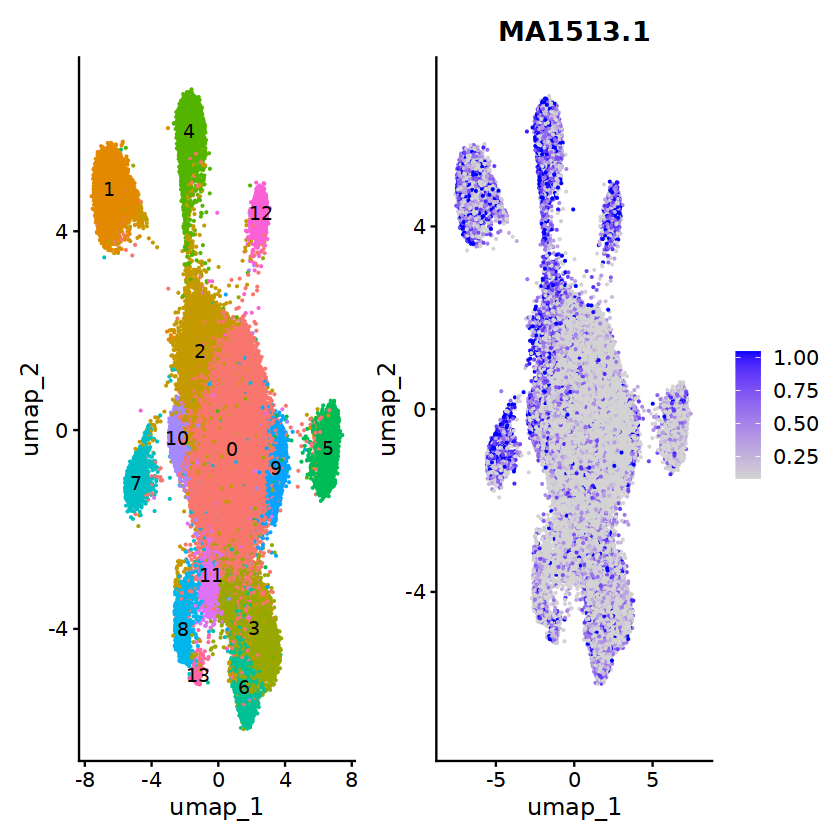

In [16]:
# look at the activity of MA0079.4
p2 <- FeaturePlot(
  object = seurat_object,
  features = "MA1513.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.1
)
p1 + p2

In [17]:
if (FALSE){
ggsave(p1, 
       filename = "exports/cluster_plot.pdf",
       device = "pdf",
       height = 6, width = 5, units = "in") 
    
ggsave(p2, 
       filename = "exports/featur_MA1513.1_plot.pdf",
       device = "pdf",
       height = 6, width = 5, units = "in") 
}

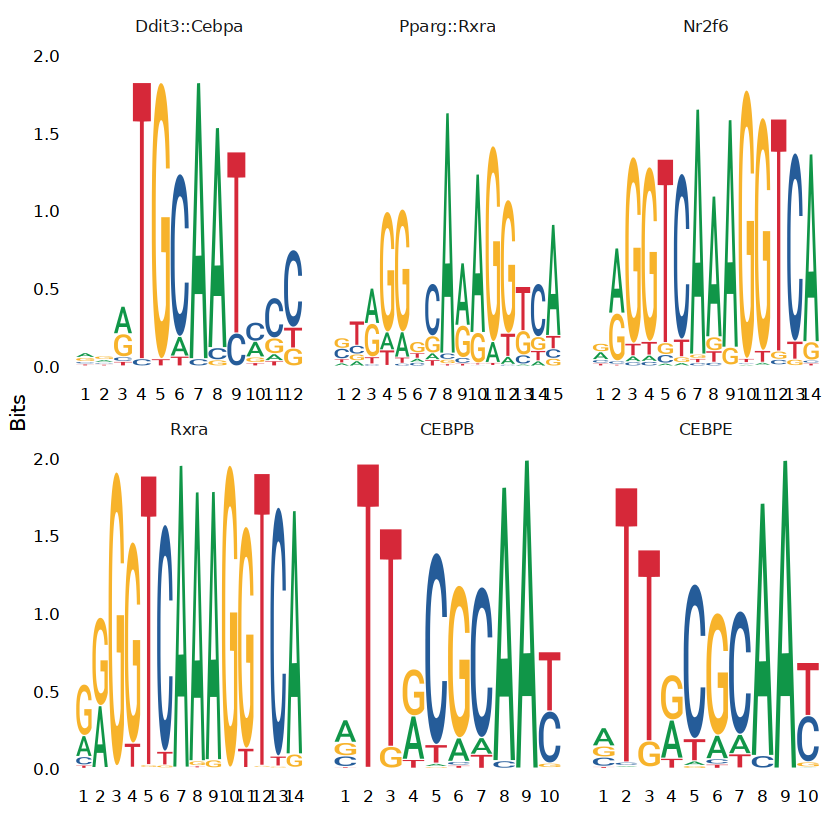

In [18]:
differential.activity <- FindMarkers(
  object = seurat_object,
  ident.1 = "Adipocyte",
  ident.2 = "Endothelial Cell (General) 1",
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)

mp <- MotifPlot(
  object = seurat_object,
  motifs = head(rownames(differential.activity)),
  assay = 'peaks'
)
mp

In [19]:
differential.activity

,p_val,avg_diff,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MA0019.1,0.000000e+00,1.3909501,0.829,0.349,0.000000e+00
MA0065.2,0.000000e+00,1.8781853,0.970,0.650,0.000000e+00
MA0677.1,0.000000e+00,1.3629696,0.958,0.764,0.000000e+00
MA0512.2,0.000000e+00,1.2127837,0.940,0.734,0.000000e+00
MA0466.2,0.000000e+00,2.7860588,0.965,0.347,0.000000e+00
MA0837.1,0.000000e+00,2.7347565,0.963,0.344,0.000000e+00
MA0838.1,0.000000e+00,2.8835846,0.972,0.344,0.000000e+00
MA0856.1,0.000000e+00,1.2864300,0.951,0.731,0.000000e+00
MA1148.1,0.000000e+00,2.8508463,0.991,0.716,0.000000e+00


In [43]:
if (TRUE){
ggsave(mp, 
       filename = "exports/motif_plot.pdf",
       device = "pdf",
       height = 6, width = 8, units = "in") 
    

}

In [20]:
enriched.motifs

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
MA1513.1,MA1513.1,778,9242,73.18909,23.1050,3.167673,2.064556e-270,KLF15,1.540159e-267
MA0599.1,MA0599.1,894,14750,84.10160,36.8750,2.280721,3.997465e-227,KLF5,1.491055e-224
MA1653.1,MA1653.1,887,14602,83.44309,36.5050,2.285799,6.768062e-224,ZNF148,1.682991e-221
MA0039.4,MA0039.4,889,14877,83.63123,37.1925,2.248605,3.144593e-219,KLF4,5.864666e-217
MA1515.1,MA1515.1,782,11044,73.56538,27.6100,2.664447,8.061637e-219,KLF2,1.202796e-216
MA0162.4,MA0162.4,703,8791,66.13358,21.9775,3.009150,2.309084e-215,EGR1,2.870961e-213
MA1564.1,MA1564.1,735,9739,69.14393,24.3475,2.839878,1.343783e-214,SP9,1.432089e-212
MA0741.1,MA0741.1,782,11211,73.56538,28.0275,2.624757,3.042944e-214,KLF16,2.837545e-212
MA0746.2,MA0746.2,737,9908,69.33208,24.7700,2.799034,2.034789e-211,SP3,1.686614e-209


In [44]:
#qsave(seurat_object, "complete/GSE184462_merged_1_10_Motif.rds")